In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
train_df = pd.read_excel('./Data_Train.xlsx')
test_df = pd.read_excel('./Data_Test.xlsx')

In [3]:
train_df.shape

(6237, 9)

In [4]:
test_df.shape

(1560, 8)

In [5]:
big_df = train_df.append(test_df,sort = False)

In [6]:
big_df.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,299.00
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62


In [7]:
big_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7797 entries, 0 to 1559
Data columns (total 9 columns):
Title           7797 non-null object
Author          7797 non-null object
Edition         7797 non-null object
Reviews         7797 non-null object
Ratings         7797 non-null object
Synopsis        7797 non-null object
Genre           7797 non-null object
BookCategory    7797 non-null object
Price           6237 non-null float64
dtypes: float64(1), object(8)
memory usage: 609.1+ KB


In [8]:
big_df['Author'].value_counts().sort_values(ascending = False).head(60)

Agatha Christie                 87
Ladybird                        63
DK                              61
Albert Uderzo                   48
Herge                           40
Nora Roberts                    40
James Patterson                 39
Bill Watterson                  36
John Grisham                    34
Sidney Sheldon                  33
P.G. Wodehouse                  33
Clive Cussler                   30
Sophie Kinsella                 27
Wilbur Smith                    26
Stephen King                    26
David Baldacci                  26
Danielle Steel                  25
Lee Child                       25
George R.R. Martin              23
Jeffrey Archer                  22
Louis L'Amour                   21
Frederick Forsyth               21
Dreamland Publications          20
Oliver Bowden                   20
Michael Crichton                19
Matthew Reilly                  19
Akira Toriyama                  19
Ruskin Bond                     18
Neil Gaiman         

In [9]:
def one_hot_top_x(df, variable, top_x_labels):
    for label in top_x_labels:
        df[variable+'_'+label] = np.where(df[variable] == label,1,0)

In [10]:
top_60 = [x for x in big_df.Author.value_counts().sort_values(ascending = False).head(60).index]

In [11]:
one_hot_top_x(big_df, 'Author', top_60)

In [12]:
big_df['edition_type'] = big_df['Edition'].str.split(',').str[0]

In [13]:
big_df['edition_type'].value_counts().sort_values(ascending = False).head(3)

Paperback                6458
Hardcover                1056
Mass Market Paperback     200
Name: edition_type, dtype: int64

In [14]:
top_3 = [x for x in big_df.edition_type.value_counts().sort_values(ascending = False).head(3).index]

In [15]:
one_hot_top_x(big_df, 'edition_type', top_3)

In [16]:
big_df = big_df.drop(['edition_type'], axis=1)

In [17]:
big_df = big_df.drop(['Author'], axis=1)

In [18]:
big_df['BookCategory'].value_counts()

Action & Adventure                      1036
Crime, Thriller & Mystery                878
Comics & Mangas                          744
Language, Linguistics & Writing          733
Biographies, Diaries & True Accounts     732
Romance                                  702
Humour                                   670
Computing, Internet & Digital Media      648
Arts, Film & Photography                 638
Sports                                   614
Politics                                 402
Name: BookCategory, dtype: int64

In [19]:
big_df = pd.get_dummies(big_df, columns=['BookCategory'])

In [20]:
big_df['Genre'].value_counts().sort_values(ascending=False).head(100)

Action & Adventure (Books)               1183
Romance (Books)                           517
Biographies & Autobiographies (Books)     463
Crime, Thriller & Mystery (Books)         335
Contemporary Fiction (Books)              325
                                         ... 
Children's Language Learning (Books)       11
Plays (Books)                              11
Psychology (Books)                         11
Meditation                                 11
Vocabulary Books                           10
Name: Genre, Length: 100, dtype: int64

In [21]:
top_100 = [x for x in big_df.Genre.value_counts().sort_values(ascending = False).head(100).index]

In [22]:
one_hot_top_x(big_df, 'Genre', top_100)

In [23]:
big_df = big_df.drop(['Genre'], axis=1)

In [24]:
big_df['reviews'] = big_df['Reviews'].str.split(' ').str[0]

In [25]:
big_df['reviews'].value_counts()

5.0    1751
4.0     713
4.5     626
4.6     491
4.4     488
4.3     450
4.7     412
4.2     406
4.1     381
3.9     300
4.8     272
3.8     239
3.7     203
3.0     176
3.6     145
3.5     143
4.9      99
3.4      92
3.3      74
1.0      65
3.1      57
3.2      50
2.0      44
2.9      36
2.5      23
2.7      18
2.8      12
2.3       7
1.5       6
2.4       5
2.6       5
2.2       3
1.4       2
1.7       1
1.6       1
2.1       1
Name: reviews, dtype: int64

In [26]:
big_df['reviews'] = big_df['reviews'].astype(float)

In [27]:
big_df = big_df.drop(['Reviews'], axis=1)

In [28]:
big_df['ratings'] = big_df['Ratings'].str.split(' ').str[0]

In [29]:
big_df['ratings'] = big_df['ratings'].replace(',','')

In [30]:
def comma_remove(df):
    a=[]
    for i in df:
        l = len(i)
        for j in i:
            if j == ',':
                i = i.replace(',','')
        a.append(i)
        
    return a

In [31]:
big_df['ratings'] = comma_remove(big_df['ratings'])

In [32]:
big_df['ratings'] = big_df['ratings'].astype(int)

In [33]:
big_df = big_df.drop(['Ratings'], axis=1)

In [34]:
big_df.head()

,Title,Edition,Synopsis,Price,Author_Agatha Christie,Author_Ladybird,Author_DK,Author_Albert Uderzo,Author_Herge,Author_Nora Roberts,...,Genre_Alphabet Reference,"Genre_Mind, Body & Spirit (Books)",Genre_Internet & Web (Books),Genre_Children's Language Learning (Books),Genre_Plays (Books),Genre_Psychology (Books),Genre_Meditation,Genre_Vocabulary Books,reviews,ratings
0,The Prisoner's Gold (The Hunters 3),"Paperback,– 10 Mar 2016",THE HUNTERS return in their third brilliant no...,220.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.0,8
1,Guru Dutt: A Tragedy in Three Acts,"Paperback,– 7 Nov 2012",A layered portrait of a troubled genius for wh...,202.93,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3.9,14
2,Leviathan (Penguin Classics),"Paperback,– 25 Feb 1982","""During the time men live without a common Pow...",299.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.8,6
3,A Pocket Full of Rye (Miss Marple),"Paperback,– 5 Oct 2017",A handful of grain is found in the pocket of a...,180.00,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.1,13
4,LIFE 70 Years of Extraordinary Photography,"Hardcover,– 10 Oct 2006","For seven decades, ""Life"" has been thrilling t...",965.62,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,5.0,1


In [35]:
big_df['edition_year'] = big_df['Edition'].str.split(' ').str[-1]

In [36]:
big_df['edition_year'].unique()

array(['2016', '2012', '1982', '2017', '2006', '2009', '2018', '2015',
       '2013', '1999', '2002', '2011', '1991', '2014', '1989', '2000',
       '2005', '2019', '2008', '2004', '2010', '2007', '2001', '1969',
       '1993', '1992', '2003', '1996', 'Import', '1997', '1995', 'NTSC',
       '1987', '1986', '1990', '1988', '1981', '1976', '1994', '1998',
       '1977', '1974', '1983', '1971', '1985', '1978', 'Facsimile', 'set',
       'Edition', '1964', '1984', '1980', 'Unabridged', '1979', 'Print',
       '1960', '1970', '1975', '1905', '1900', 'Audiobook', '1961',
       '1925', '1973', 'Illustrated', '1942', '1972'], dtype=object)

In [37]:
big_df['edition_year'].value_counts().head(37)

2018    1018
2017     930
2016     835
2015     639
2014     503
2013     463
2019     457
2012     367
2011     356
2010     306
2009     234
2008     204
2005     165
2006     139
2007     131
2003     119
2004     108
2000      83
2002      83
2001      80
1999      54
1997      46
1995      41
1994      39
1996      39
1998      39
1992      38
1993      26
1991      26
1989      24
1984      18
1990      18
1986      18
1987      17
1988      15
1982      14
1985      12
Name: edition_year, dtype: int64

In [38]:
top_37 = [x for x in big_df.edition_year.value_counts().sort_values(ascending = False).head(37).index]

In [39]:
one_hot_top_x(big_df, 'edition_year', top_37)

In [40]:
big_df['edition_month'] = big_df['Edition'].str.split(' ').str[-2]

In [41]:
big_df['edition_month'].value_counts().head(12)

Oct    795
Sep    696
May    668
Jan    637
Nov    625
Jun    605
Apr    605
Jul    580
Mar    574
Aug    544
Feb    508
Dec    503
Name: edition_month, dtype: int64

In [42]:
top_12 = [x for x in big_df.edition_month.value_counts().sort_values(ascending = False).head(12).index]

In [43]:
one_hot_top_x(big_df, 'edition_month', top_12)

In [44]:
big_df = big_df.drop(['Edition'], axis=1)

In [45]:
big_df = big_df.drop(['edition_year', 'edition_month'], axis=1)

In [46]:
big_df.head()

,Title,Synopsis,Price,Author_Agatha Christie,Author_Ladybird,Author_DK,Author_Albert Uderzo,Author_Herge,Author_Nora Roberts,Author_James Patterson,...,edition_month_May,edition_month_Jan,edition_month_Nov,edition_month_Jun,edition_month_Apr,edition_month_Jul,edition_month_Mar,edition_month_Aug,edition_month_Feb,edition_month_Dec
0,The Prisoner's Gold (The Hunters 3),THE HUNTERS return in their third brilliant no...,220.00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,Guru Dutt: A Tragedy in Three Acts,A layered portrait of a troubled genius for wh...,202.93,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,Leviathan (Penguin Classics),"""During the time men live without a common Pow...",299.00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,A Pocket Full of Rye (Miss Marple),A handful of grain is found in the pocket of a...,180.00,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,LIFE 70 Years of Extraordinary Photography,"For seven decades, ""Life"" has been thrilling t...",965.62,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Here we may drop 'title' and 'synopsis' which also used with nlp

In [47]:
big_df = big_df.drop(['Title', 'Synopsis'], axis=1)

In [48]:
big_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7797 entries, 0 to 1559
Columns: 226 entries, Price to edition_month_Dec
dtypes: float64(2), int32(213), uint8(11)
memory usage: 6.6 MB


In [49]:
X = big_df.iloc[:,1:].values
y = big_df.iloc[:,0].values

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(X, test_size = 0.2, random_state = 0)

In [51]:
X_train.shape

(6237, 225)

In [52]:
y_train = y[0:6237]

In [53]:
y_train.shape

(6237,)

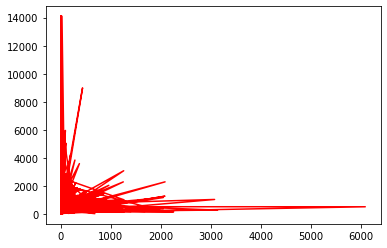

In [54]:
plt.plot(X_train, y_train, color = 'red')

# Now apply ML model to predict price

In [55]:
#from sklearn.ensemble import RandomForestRegressor
#regressor = RandomForestRegressor(n_estimators=10,criterion='mse')
#regressor.fit(X_train, y_train)

In [58]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(criterion='mse')
regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [59]:
y_test = regressor.predict(X_test)

In [60]:
y_test

array([ 388.51,  556.  ,  295.  , ..., 2964.  , 1007.  ,  162.  ])

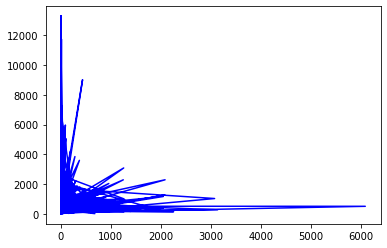

In [61]:
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.show()

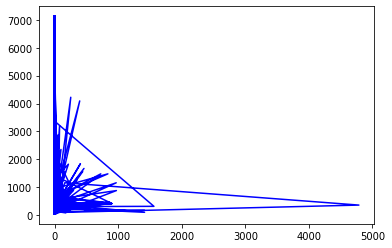

In [62]:
plt.plot(X_test, regressor.predict(X_test), color = 'blue')
plt.show()

In [63]:
df = pd.DataFrame (y_test)
filepath = 'my_sub_dt.xlsx'
df.to_excel(filepath, index=False)